In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.colors as mcolors
import matplotlib.cm as cm

#from src.config import DADOS_ORIGINAIS, DADOS_TRATADOS
from src.models import RANDOM_STATE

sns.set_theme(palette="bright")

#### Importando os dados
- Usando o encoding='cp863' do Canada

In [2]:
df_2024 = pd.read_csv('../dados/canada_2024.csv', encoding='cp863')
df_2023 = pd.read_csv('../dados/canada_2023.csv', encoding='cp863')
df_2022 = pd.read_csv('../dados/canada_2022.csv', encoding='cp863')
df_2021 = pd.read_csv('../dados/canada_2021.csv', encoding='cp863')
df_2020 = pd.read_csv('../dados/canada_2020.csv', encoding='cp863')
df_2015_2019 = pd.read_csv('../dados/canada_2015_2019.csv', encoding='cp863')
df_2005_2014 = pd.read_csv('../dados/canada_2005_2014.csv', encoding='cp863')

# Poderíamos usar o encoding = 'latin' também, mas o cp863 é mais específico para o francês canadense

#### Analisando se todas colunas são iguais

In [3]:
df_2024.columns == df_2005_2014.columns

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [4]:
df_2024.head(1)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7


In [5]:
df_2005_2014.head(1)

,∩╗┐Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,NaN,NaN


In [6]:
df_2015_2019 = df_2015_2019.rename(columns={"∩╗┐Model year": 'Model year'})
df_2005_2014 = df_2005_2014.rename(columns={"∩╗┐Model year": 'Model year'})

df_2005_2014.head(2)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,NaN,NaN
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,34,191,NaN,NaN


#### Juntando todos os dataframes

In [7]:
df = pd.concat([df_2005_2014, df_2015_2019, df_2020, df_2021, df_2022, df_2023, df_2024])#, columns=)
df = df.reset_index(drop=True)
df

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,NaN,NaN
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,34,191,NaN,NaN
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,21,315,NaN,NaN
3,2005,Acura,NSX,Two-seater,3.0,6,AS4,Z,15.1,10.5,13.0,22,299,NaN,NaN
4,2005,Acura,NSX,Two-seater,3.2,6,M6,Z,15.1,10.5,13.0,22,299,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20516,2024,Volvo,V60 CC B5 AWD,Station wagon: Small,2.0,4,AS8,Z,10.0,7.5,8.9,32,207,5.0,5.0
20517,2024,Volvo,V90 CC B6 AWD,Station wagon: Mid-size,2.0,4,AS8,Z,10.7,8.1,9.5,30,223,5.0,7.0
20518,2024,Volvo,XC40 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,9.9,7.8,9.0,31,210,5.0,5.0
20519,2024,Volvo,XC60 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,10.6,8.3,9.6,29,226,5.0,5.0


#### Análise da base

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20521 entries, 0 to 20520
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            20521 non-null  int64  
 1   Make                  20521 non-null  object 
 2   Model                 20521 non-null  object 
 3   Vehicle class         20521 non-null  object 
 4   Engine size (L)       20521 non-null  float64
 5   Cylinders             20521 non-null  int64  
 6   Transmission          20521 non-null  object 
 7   Fuel type             20521 non-null  object 
 8   City (L/100 km)       20521 non-null  float64
 9   Highway (L/100 km)    20521 non-null  float64
 10  Combined (L/100 km)   20521 non-null  float64
 11  Combined (mpg)        20521 non-null  int64  
 12  CO2 emissions (g/km)  20521 non-null  int64  
 13  CO2 rating            8832 non-null   float64
 14  Smog rating           7726 non-null   float64
dtypes: float64(6), int6

In [9]:
with pd.option_context("display.float_format", "{:,.2f}".format):
    display(df.describe())

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,"20,521.00","20,521.00","20,521.00","20,521.00","20,521.00","20,521.00","20,521.00","20,521.00","8,832.00","7,726.00"
mean,"2,014.24",3.34,5.83,13.44,9.72,11.76,25.74,266.81,4.63,4.82
std,5.59,1.35,1.87,3.78,2.52,3.18,7.02,63.51,1.58,1.79
min,"2,005.00",0.80,2.00,4.00,3.90,4.00,11.00,94.00,1.00,1.00
25%,"2,009.00",2.20,4.00,10.80,8.00,9.60,21.00,221.00,4.00,3.00
50%,"2,014.00",3.00,6.00,13.00,9.30,11.30,25.00,262.00,5.00,5.00
75%,"2,019.00",4.00,8.00,15.50,11.00,13.40,29.00,304.00,5.00,6.00
max,"2,024.00",8.40,16.00,30.70,22.10,26.10,71.00,608.00,10.00,8.00


In [10]:
df.describe(exclude='number')

,Make,Model,Vehicle class,Transmission,Fuel type
count,20521,20521,20521,20521,20521
unique,48,3522,17,29,5
top,Chevrolet,Mustang,Mid-size,AS6,X
freq,1884,96,2736,2876,10179


#### Analisando valores duplicados e nulos

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Model year                  0
Make                        0
Model                       0
Vehicle class               0
Engine size (L)             0
Cylinders                   0
Transmission                0
Fuel type                   0
City (L/100 km)             0
Highway (L/100 km)          0
Combined (L/100 km)         0
Combined (mpg)              0
CO2 emissions (g/km)        0
CO2 rating              11689
Smog rating             12795
dtype: int64

In [13]:
df[df.isnull().all(axis=1)]

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating


In [14]:
df[df.isnull().any(axis=1)]

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,NaN,NaN
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,34,191,NaN,NaN
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,21,315,NaN,NaN
3,2005,Acura,NSX,Two-seater,3.0,6,AS4,Z,15.1,10.5,13.0,22,299,NaN,NaN
4,2005,Acura,NSX,Two-seater,3.2,6,M6,Z,15.1,10.5,13.0,22,299,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,2016,Volvo,XC70 T5,Sport utility vehicle: Small,2.0,4,AS8,X,10.3,7.6,9.1,31,213,6.0,NaN
12791,2016,Volvo,XC70 T5 AWD,Sport utility vehicle: Small,2.5,5,AS6,X,12.5,9.2,11.0,26,254,5.0,NaN
12792,2016,Volvo,XC90 T5,Sport utility vehicle: Standard,2.0,4,AS8,Z,10.6,9.1,10.0,28,232,5.0,NaN
12793,2016,Volvo,XC90 T5 AWD,Sport utility vehicle: Standard,2.0,4,AS8,Z,10.8,9.5,10.2,28,239,5.0,NaN


In [15]:
df[df['CO2 rating'].notnull()]['Model year'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=int64)

In [16]:
df[df['Smog rating'].notnull()]['Model year'].unique()

array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=int64)

Veja que as classificações 'CO2 rating' e 'Smog rating' começaram depois de 2016 e 2017 respectivamente

#### Analise de colunas categoricas

In [17]:
df.select_dtypes(exclude='number')

,Make,Model,Vehicle class,Transmission,Fuel type
0,Acura,1.7EL,Compact,A4,X
1,Acura,1.7EL,Compact,M5,X
2,Acura,MDX AWD,Sport utility vehicle,A5,Z
3,Acura,NSX,Two-seater,AS4,Z
4,Acura,NSX,Two-seater,M6,Z
...,...,...,...,...,...
20516,Volvo,V60 CC B5 AWD,Station wagon: Small,AS8,Z
20517,Volvo,V90 CC B6 AWD,Station wagon: Mid-size,AS8,Z
20518,Volvo,XC40 B5 AWD,Sport utility vehicle: Small,AS8,Z
20519,Volvo,XC60 B5 AWD,Sport utility vehicle: Small,AS8,Z


In [18]:
df.select_dtypes(exclude='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20521 entries, 0 to 20520
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           20521 non-null  object
 1   Model          20521 non-null  object
 2   Vehicle class  20521 non-null  object
 3   Transmission   20521 non-null  object
 4   Fuel type      20521 non-null  object
dtypes: object(5)
memory usage: 801.7+ KB


In [19]:
df.select_dtypes(exclude='number').nunique()

Make               48
Model            3522
Vehicle class      17
Transmission       29
Fuel type           5
dtype: int64

In [20]:
df['Transmission'].value_counts()         # é o tipo de transmissão e a quantidade de marchas acredito


Transmission
AS6     2876
M6      2524
AS8     2193
A6      1944
A4      1850
M5      1164
A8       989
A5       889
AV       864
AM7      794
AS5      673
A9       650
AS7      621
AS10     506
A10      279
A7       276
AM8      232
AM6      215
AS4      162
AV6      159
AS9      158
AV7      157
M7       151
AV8      124
AV10      39
AV1       19
AM9        6
AM5        6
M4         1
Name: count, dtype: int64

In [21]:
df['Vehicle class'].value_counts() 

Vehicle class
Mid-size                           2736
Compact                            2586
Sport utility vehicle: Small       2158
Sport utility vehicle              1980
Pickup truck: Standard             1844
Subcompact                         1761
Full-size                          1445
Sport utility vehicle: Standard    1430
Two-seater                         1239
Minicompact                         953
Station wagon: Small                787
Pickup truck: Small                 503
Minivan                             308
Station wagon: Mid-size             238
Van: Passenger                      222
Van: Cargo                          212
Special purpose vehicle             119
Name: count, dtype: int64

In [22]:
df['Fuel type'].value_counts()

Fuel type
X    10179
Z     8938
E     1034
D      369
N        1
Name: count, dtype: int64

In [23]:
df['Model'].to_list()

['1.7EL',
 '1.7EL',
 'MDX AWD',
 'NSX',
 'NSX',
 'RL',
 'RSX',
 'RSX',
 'RSX',
 'TL',
 'TL',
 'TSX',
 'TSX',
 'A4',
 'A4 quattro',
 'A4 quattro',
 'A4 quattro',
 'A4 quattro',
 'A4 quattro',
 'A4 Cabriolet',
 'A4 Cabriolet',
 'A4 Cabriolet quattro',
 'A4 Avant',
 'A4 Avant quattro',
 'A4 Avant quattro',
 'A4 Avant quattro',
 'A4 Avant quattro',
 'A4 Avant quattro',
 'A6 quattro',
 'A6 quattro',
 'A6 Avant quattro',
 'A8',
 'A8L',
 'A8L',
 'allroad quattro',
 'allroad quattro',
 'S4',
 'S4',
 'S4 Cabriolet',
 'S4 Cabriolet',
 'S4 Avant',
 'S4 Avant',
 'TT Coupe',
 'TT Coupe quattro',
 'TT Coupe quattro',
 'TT Roadster',
 'TT Roadster quattro',
 'TT Roadster quattro',
 'Arnage',
 'Arnage LWB',
 'Continental GT',
 '320i',
 '320i',
 '325Ci',
 '325Ci',
 '325Ci',
 '325Ci Convertible',
 '325Ci Convertible',
 '325Ci Convertible',
 '325i',
 '325i',
 '325i',
 '325xi',
 '325xi',
 '325i Sport Wagon',
 '325i Sport Wagon',
 '325i Sport Wagon',
 '325xi Sport Wagon',
 '325xi Sport Wagon',
 '330Ci',
 '

#### Devo modificar algumas colunas do dataframe?
- Simplificar o tipo de transmissão excluindo numero de marchas
- Criar coluna com número de marchas do carro
- Mudar o tipo do combustível pra ficar conforme descrição do dicionário de dados?
- Mudar o tipo do veículo pra ficar conforme descrição do dicionário de dados?
- Eliminar outliers? 
- Eliminar alguma coluna?

##### Alterando a transmissão separando o número de marchas

In [24]:
df['Transmission'].unique()

array(['A4', 'M5', 'A5', 'AS4', 'M6', 'AS5', 'AV', 'AS6', 'AM6', 'A6',
       'A7', 'AM7', 'AS7', 'AS8', 'M4', 'A8', 'M7', 'AV7', 'AV8', 'AV6',
       'AM5', 'A9', 'AS9', 'AM8', 'AM9', 'AS10', 'A10', 'AV10', 'AV1'],
      dtype=object)

In [25]:
df['gears'] = df['Transmission'].str.extract(r"(\d+)").astype(float)  
# Vai extrair os números de marchas e criar a coluna 'gears'

df['Transmission'] = df['Transmission'].str.replace(r'\d+', '', regex=True)           
# Vai substituir os números por vazio, ou seja, vai retirar os números (r'\d+' significa "qualquer numero")
# o regex=True é para usar expressões regulares  "r'\d+'" --> se não o python vai procurar exatamente por '\d+' como string

df['Transmission'].unique()

array(['A', 'M', 'AS', 'AV', 'AM'], dtype=object)

In [26]:
df['gears'].unique()

array([ 4.,  5.,  6., nan,  7.,  8.,  9., 10.,  1.])

#### Mudando as abreviações do tipo do combustível pela descrição do combustível

In [27]:
df['Fuel type'].unique()

array(['X', 'Z', 'E', 'D', 'N'], dtype=object)

In [28]:
fuel = {
    'X': "regular_gasoline",
    'Z': "premium_gasoline",
    'D': "diesel",
    'E': "ethanol",
    'N': "natural_gas",
}

df['Fuel type'] = df['Fuel type'].map(fuel)
df['Fuel type'].unique()

array(['regular_gasoline', 'premium_gasoline', 'ethanol', 'diesel',
       'natural_gas'], dtype=object)

#### Eliminar outliers?
 - R: Nesse caso não, pois são dados reais, e os valores máximos de cada feature estão muito próximos dos demais valores

#### Eliminar colunas?
-  **'Model':** temos 3522 valores unicos, são muitos dados variados, não vale a pena manter na base que será exportada
- **'Make'**: temos 48 valores unicos, são muitos dados variados, não vale a pena manter na base que será exportada, mas vamos manter na analise exploratória da base
- **'CO2 rating'** e **'Smog rating'**: são informações que tem alta correlação com o CO2 emissions, que será nossa variável alvo do modelo, ou seja, manter essa coluna representa um 'vazamento de informações'
- **'Combined (mpg)'**: já temos essa informação através da coluna "Combined (L/100 km)"

In [29]:
df['Model'].nunique()

3522

In [30]:
df = df.drop(columns=['Combined (mpg)'])
#df = df.drop(columns=['Make', 'Model', 'CO2 rating', 'Smog rating'])     --> eliminar num segundo momento
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),CO2 emissions (g/km),CO2 rating,Smog rating,gears
0,2005,Acura,1.7EL,Compact,1.7,4,A,regular_gasoline,9.2,7.2,8.3,191,NaN,NaN,4.0
1,2005,Acura,1.7EL,Compact,1.7,4,M,regular_gasoline,9.1,7.3,8.3,191,NaN,NaN,5.0
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A,premium_gasoline,15.9,11.1,13.7,315,NaN,NaN,5.0
3,2005,Acura,NSX,Two-seater,3.0,6,AS,premium_gasoline,15.1,10.5,13.0,299,NaN,NaN,4.0
4,2005,Acura,NSX,Two-seater,3.2,6,M,premium_gasoline,15.1,10.5,13.0,299,NaN,NaN,6.0


#### Separando colunas categoricas

In [31]:
categoricas = df.select_dtypes(exclude='number').columns
categoricas = categoricas.to_list()

categoricas.extend(['Model year', 'Cylinders', 'gears'])
categoricas

['Make',
 'Model',
 'Vehicle class',
 'Transmission',
 'Fuel type',
 'Model year',
 'Cylinders',
 'gears']

#### Analisando graficamente as features categoricas

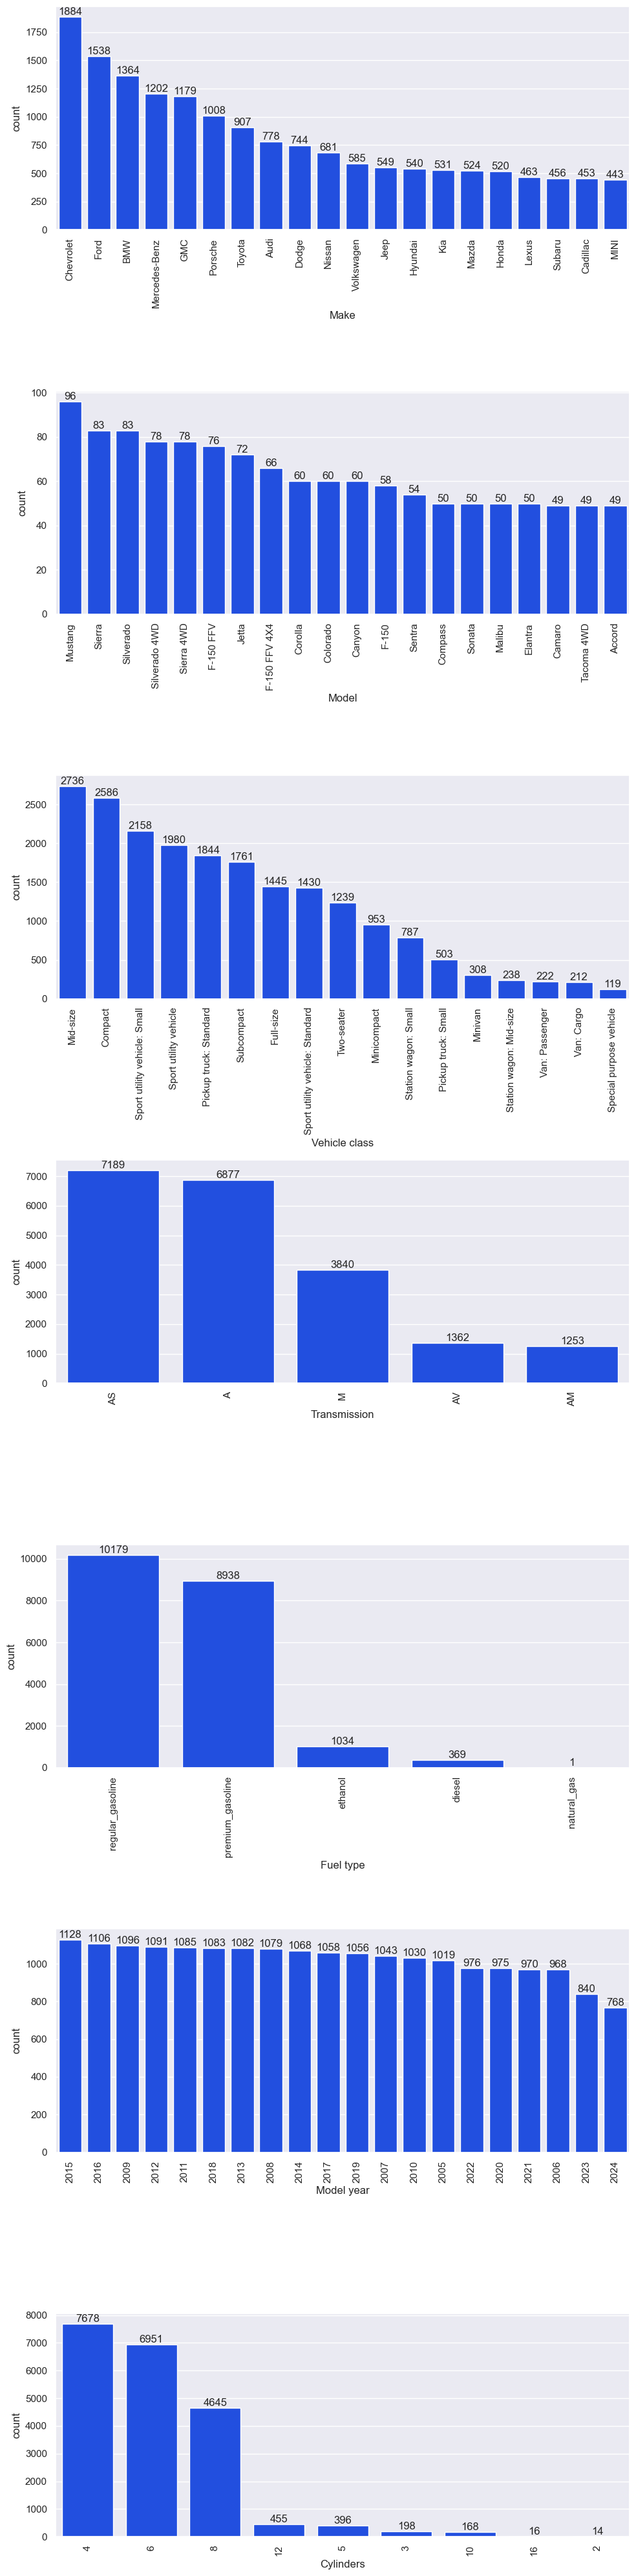

In [32]:
fig, ax = plt.subplots(7,1, figsize=(10,40))

for ax, coluna in zip(ax.flatten(), categoricas):
    sns.countplot(
        x=coluna, 
        data=df, 
        ax=ax,
        order = df[coluna].value_counts().index[:20]          # ordenar para aparecer os 20 mais frequentes
    )
    ax.bar_label(ax.containers[0], fmt='%.0f')  # Adiciona rótulos às barras com o valor exato
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

**Análises dos Gráficos:**
- Tipo de Combustível: Talvez tenhamos que eliminar a linha onde o tipo de combustível é natural gas, porque só tem 1 registro
- Model year: Podemos ver que o número de veículos nos anos 2023 e 2024 reduziu bastante, será que está faltando algum registro nessa base de dados?
- Cylinders: temos poucos dados de carros com 16 ou 2 cilindros, não sei se devemos manter esses dados ou se devemos agrupar om outro valor (acima de 12 cilindros, por exemplo) 
- Gears: temos 19 registros de carros com apenas 1 gears, o que é estranho.

In [33]:
df[df['gears']==1]

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),CO2 emissions (g/km),CO2 rating,Smog rating,gears
17419,2021,Hyundai,Elantra,Mid-size,2.0,4,AV,regular_gasoline,7.5,5.7,6.7,157,7.0,5.0,1.0
17420,2021,Hyundai,Elantra (ISG),Mid-size,2.0,4,AV,regular_gasoline,7.1,5.5,6.4,152,8.0,5.0,1.0
17443,2021,Hyundai,Venue,Mid-size,1.6,4,AV,regular_gasoline,7.9,7.0,7.5,178,7.0,5.0,1.0
17512,2021,Kia,Rio,Compact,1.6,4,AV,regular_gasoline,7.2,6.0,6.7,159,7.0,3.0,1.0
18394,2022,Hyundai,Elantra,Mid-size,2.0,4,AV,regular_gasoline,7.6,5.7,6.7,158,7.0,5.0,1.0
18395,2022,Hyundai,Elantra (ISG),Mid-size,2.0,4,AV,regular_gasoline,7.1,5.5,6.4,151,7.0,5.0,1.0
18421,2022,Hyundai,Venue,Mid-size,1.6,4,AV,regular_gasoline,7.9,6.9,7.5,176,7.0,5.0,1.0
18490,2022,Kia,Rio,Compact,1.6,4,AV,regular_gasoline,7.2,6.0,6.7,159,7.0,3.0,1.0
19326,2023,Hyundai,Elantra,Mid-size,2.0,4,AV,regular_gasoline,7.6,5.7,6.7,158,7.0,5.0,1.0
19327,2023,Hyundai,Elantra (ISG),Mid-size,2.0,4,AV,regular_gasoline,7.1,5.5,6.4,151,7.0,5.0,1.0


Veja que todos os dados onde gears=1 a transmissão é AV (Variável contínua). 
Parece ser o cambio CVT, onde o carro faz a troca de marcha de maneira contínua, como se não variasse de uma marcha pra outra.

In [34]:
pd.crosstab(df['gears'], df['Transmission'], dropna=False)

Transmission,A,AM,AS,AV,M
gears,,,,,
1.0,0,0,0,19,0
4.0,1850,0,162,0,1
5.0,889,6,673,0,1164
6.0,1944,215,2876,159,2524
7.0,276,794,621,157,151
8.0,989,232,2193,124,0
9.0,650,6,158,0,0
10.0,279,0,506,39,0
NaN,0,0,0,864,0


Podemos ver que apenas a transmissão AV tem engrenagem de 1 marcha. Também todos os registros nulos (NaN) da transmissão pertencem a essa marcha também. Mas também temos vários dados dessa transmissão com 6, 7, 8 ou 10 marchas. Fica o questionamento se essa feature é importante para o objetivo desse projeto que é a emissão de CO2 dos carros.

#### Analises Graficas - Colunas Numéricas

In [35]:
df.select_dtypes('number').columns

Index(['Model year', 'Engine size (L)', 'Cylinders', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'CO2 emissions (g/km)',
       'CO2 rating', 'Smog rating', 'gears'],
      dtype='object')

In [36]:
df.select_dtypes('number').columns.shape

(10,)

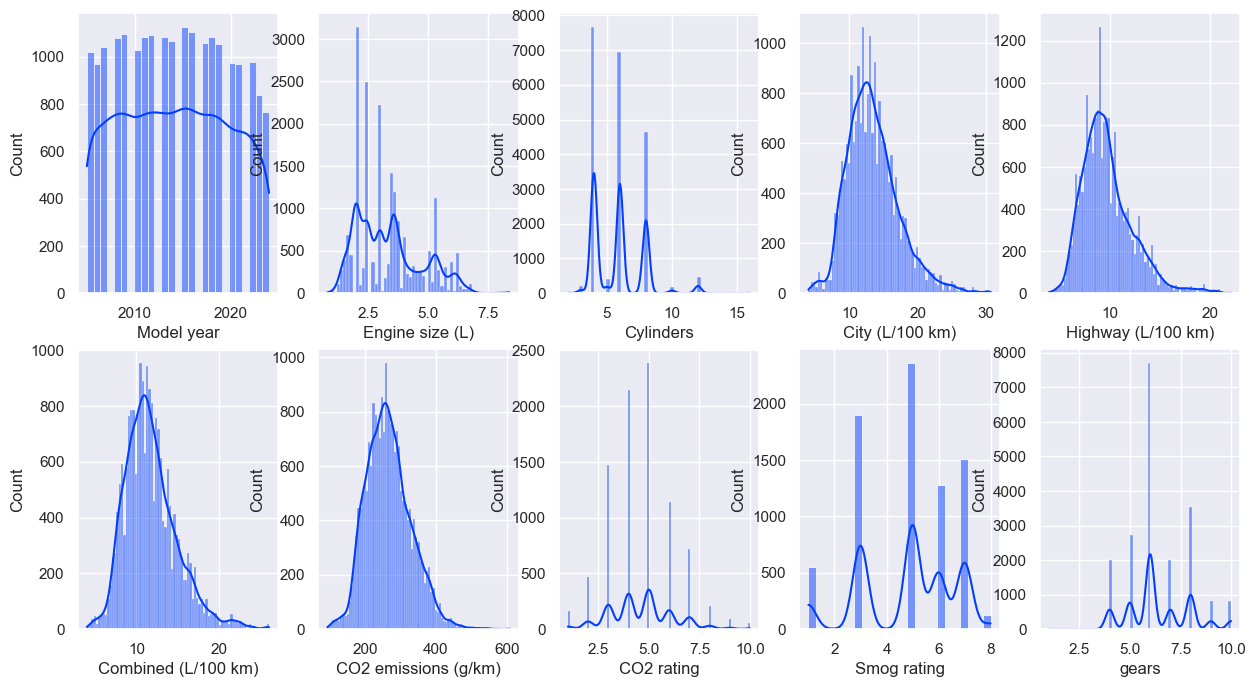

In [37]:
fig, axs = plt.subplots(2,5, figsize=(15,8))

for ax, coluna in zip(axs.flatten(), df.select_dtypes('number').columns):
    sns.histplot(x=coluna, data=df, ax=ax, kde=True)

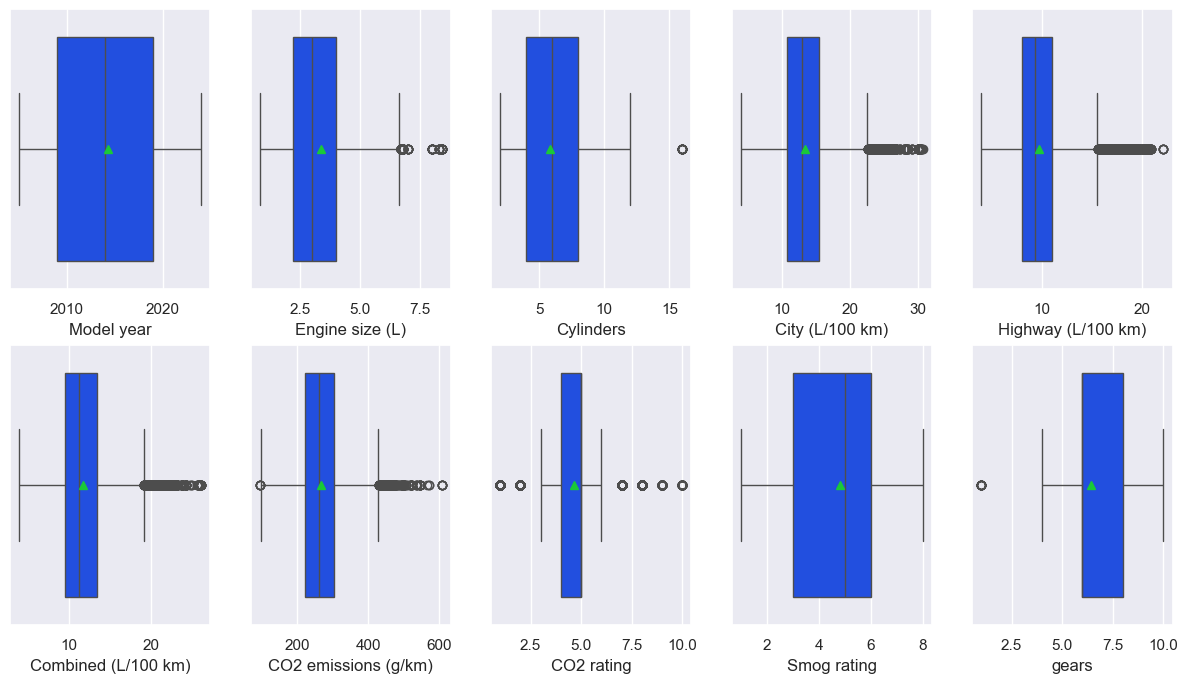

In [38]:
fig, axs = plt.subplots(2,5, figsize=(15,8))

for ax, coluna in zip(axs.flatten(), df.select_dtypes('number').columns):
    sns.boxplot(x=coluna, data=df, ax=ax, showmeans=True)

#### Analise de Correlações

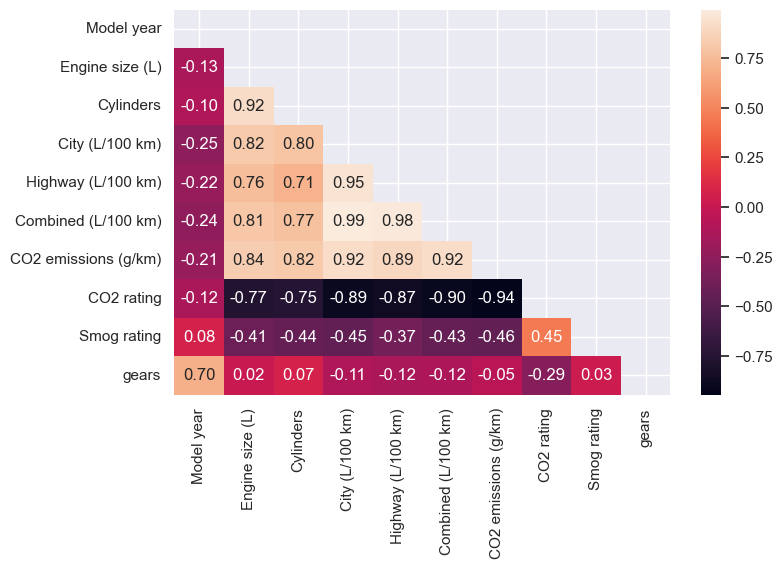

In [39]:
corr = df.select_dtypes('number').corr()

matriz = np.triu(corr)

fig, ax = plt.subplots(figsize=(8,5))

sns.heatmap(corr, mask=matriz, annot=True, fmt='.2f', ax=ax)

plt.show()

#### Analisar como as Emissões de CO2 podem variar de acordo com outras features

##### Comparando Emissão de CO2 por Fabricante

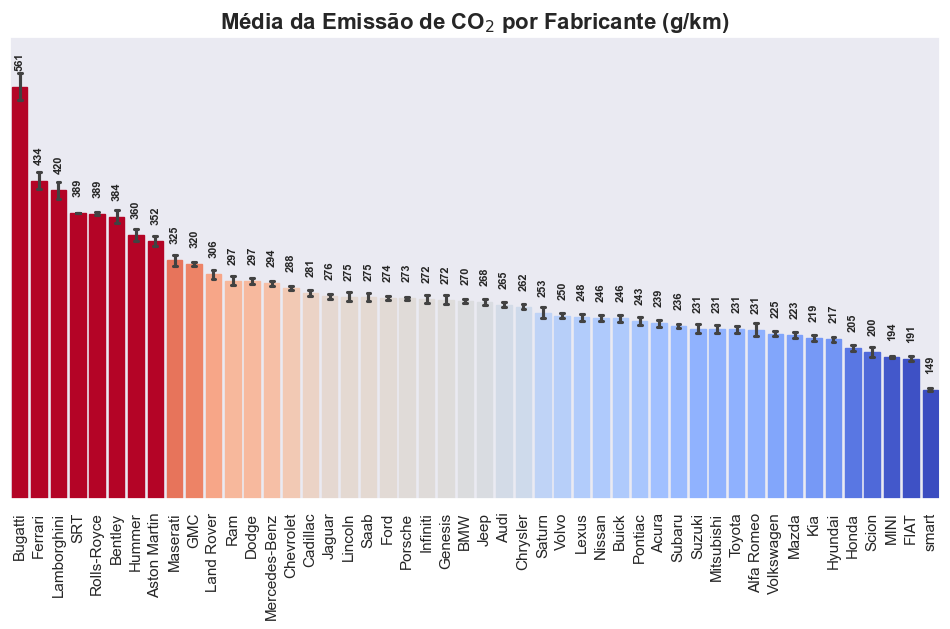

In [40]:
fig, ax = plt.subplots(figsize=(12,6))

# Gráfico de barras
sns.barplot(
    data=df,
    x='Make',
    y='CO2 emissions (g/km)',
    ax=ax,
    order = df.groupby('Make')['CO2 emissions (g/km)'].mean().sort_values(ascending=False).index,
    capsize=0.2                                                 # para adicionar barras do desvio padrão em cima de cada barra
)

# Anotação dos valores nas barras
ax.bar_label(
    ax.containers[0], 
    fmt='%.0f', 
    label_type='edge', 
    padding=12, 
    fontsize=8,
    rotation=90,
    weight='bold'
)

# Retirando labels e colocando títulos
ax.set_ylim(0, 630)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_yticks([])

co2_latex = r"CO$_2$"       # Pra ficar CO₂ com 2minusculo no titulo do gráfico
ax.set_title(f"Média da Emissão de {co2_latex} por Fabricante (g/km)", fontsize=16, weight='bold')

# escala de cores
norm = mcolors.Normalize(
    vmin=df['CO2 emissions (g/km)'].quantile(0.1), 
    vmax=df['CO2 emissions (g/km)'].quantile(0.9))

cmap = cm.coolwarm

for barra in ax.patches:
    barra.set_color(cmap(norm(barra.get_height())))


plt.xticks(rotation=90)
plt.show()

Veja que as marcas mais esportivas tem maior emissão de CO2, talvez devido à maior potência do motor.

In [41]:
pd.crosstab(df['Make'], df['Cylinders'], dropna=False)

Cylinders,2,3,4,5,6,8,10,12,16
Make,,,,,,,,,
Acura,0,0,99,0,112,0,0,0,0
Alfa Romeo,0,0,41,0,15,0,0,0,0
Aston Martin,0,0,0,0,0,54,0,64,0
Audi,0,0,305,9,250,156,48,10,0
BMW,0,0,213,0,750,358,25,18,0
Bentley,0,0,0,0,0,61,0,66,0
Bugatti,0,0,0,0,0,0,0,0,16
Buick,0,13,111,0,108,11,0,0,0
Cadillac,0,0,104,0,223,126,0,0,0


##### Comparando Emissão de CO2 por Tipo de Veículo

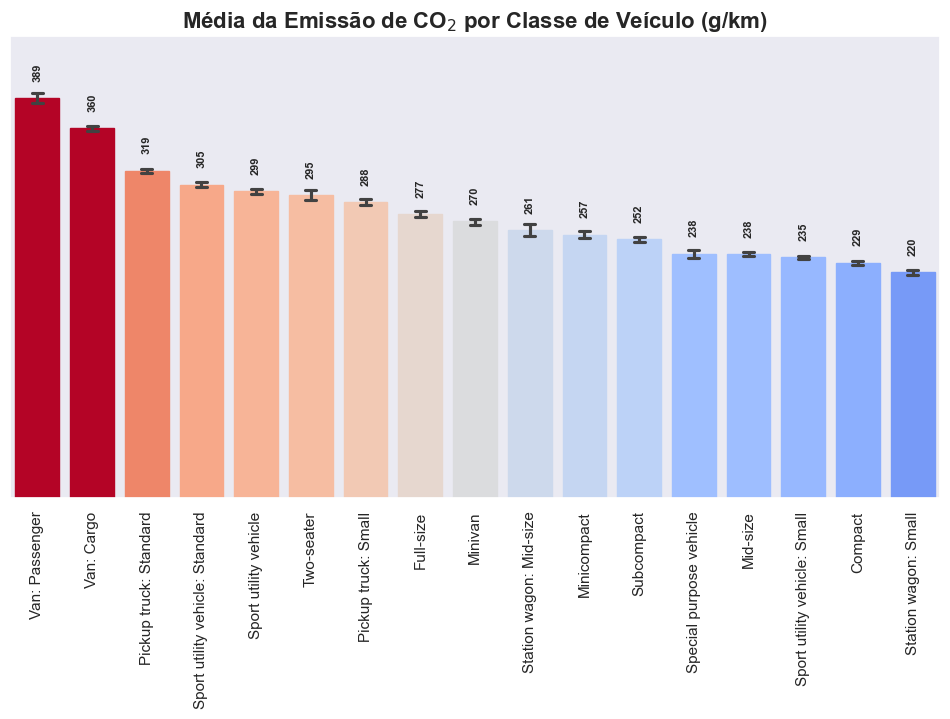

In [42]:
fig, ax = plt.subplots(figsize=(12,6))

# Gráfico de barras
sns.barplot(
    data=df,
    x='Vehicle class',
    y='CO2 emissions (g/km)',
    ax=ax,
    order = df.groupby('Vehicle class')['CO2 emissions (g/km)'].mean().sort_values(ascending=False).index,
    capsize=0.2                                                 # para adicionar barras do desvio padrão em cima de cada barra
)

# Anotação dos valores nas barras
ax.bar_label(
    ax.containers[0], 
    fmt='%.0f', 
    label_type='edge', 
    padding=12, 
    fontsize=8,
    rotation=90,
    weight='bold'
)

# Retirando labels e colocando títulos
ax.set_ylim(0, 450)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_yticks([])

co2_latex = r"CO$_2$"       # Pra ficar CO₂ com 2minusculo no titulo do gráfico
ax.set_title(f"Média da Emissão de {co2_latex} por Classe de Veículo (g/km)", fontsize=16, weight='bold')

# escala de cores
norm = mcolors.Normalize(
    vmin=df['CO2 emissions (g/km)'].quantile(0.1), 
    vmax=df['CO2 emissions (g/km)'].quantile(0.9))

cmap = cm.coolwarm

for barra in ax.patches:
    barra.set_color(cmap(norm(barra.get_height())))


plt.xticks(rotation=90)
plt.show()

##### Comparando Emissão de CO2 por Ano do Veículo

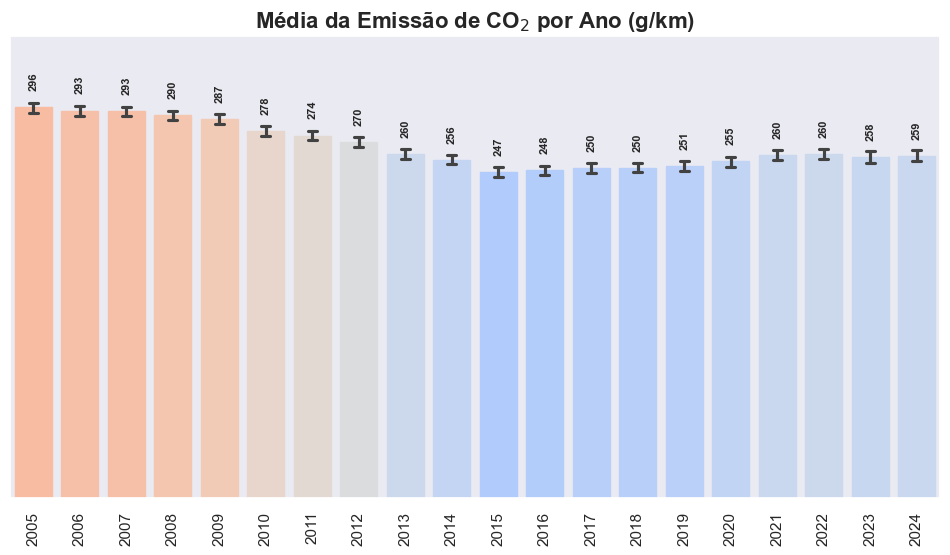

In [43]:
fig, ax = plt.subplots(figsize=(12,6))

# Gráfico de barras
sns.barplot(
    data=df,
    x='Model year',
    y='CO2 emissions (g/km)',
    ax=ax,
    #order = df.groupby('Model year')['CO2 emissions (g/km)'].mean().sort_values(ascending=False).index,
    capsize=0.2                                                 # para adicionar barras do desvio padrão em cima de cada barra
)

# Anotação dos valores nas barras
ax.bar_label(
    ax.containers[0], 
    fmt='%.0f', 
    label_type='edge', 
    padding=12, 
    fontsize=8,
    rotation=90,
    weight='bold'
)

# Retirando labels e colocando títulos
ax.set_ylim(0, 350)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_yticks([])

co2_latex = r"CO$_2$"       # Pra ficar CO₂ com 2minusculo no titulo do gráfico
ax.set_title(f"Média da Emissão de {co2_latex} por Ano (g/km)", fontsize=16, weight='bold')

# escala de cores
norm = mcolors.Normalize(
    vmin=df['CO2 emissions (g/km)'].quantile(0.1), 
    vmax=df['CO2 emissions (g/km)'].quantile(0.9))

cmap = cm.coolwarm

for barra in ax.patches:
    barra.set_color(cmap(norm(barra.get_height())))


plt.xticks(rotation=90)
plt.show()

Por que será que a emissão dos veículos aumentou na média de 2015 pra frente? 
- Será que o percentual de veículos maiores (vans), ou mais esportivos, aumentou com o tempo?
- Será que a diferença do tipo de combustível mais usado pode ter mudado com o tempo influenciando a média de emissão de CO2?
- Será que os carros começaram a emitir mais CO2 (isso é contra intuitivo!)

In [44]:
pd.crosstab(df['Model year'], df['Vehicle class'], dropna=False)

Vehicle class,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,Pickup truck: Standard,Special purpose vehicle,Sport utility vehicle,Sport utility vehicle: Small,Sport utility vehicle: Standard,Station wagon: Mid-size,Station wagon: Small,Subcompact,Two-seater,Van: Cargo,Van: Passenger
Model year,,,,,,,,,,,,,,,,,
2005,146,45,114,74,33,0,127,0,224,0,0,38,54,87,52,13,12
2006,137,56,111,37,35,0,141,0,221,0,0,28,53,78,49,14,8
2007,116,54,139,47,34,0,154,0,240,0,0,32,44,83,61,27,12
2008,148,63,134,49,22,52,72,0,267,0,0,18,43,100,73,26,12
2009,152,68,125,43,16,59,95,0,268,0,0,13,56,99,64,26,12
2010,144,77,120,41,14,54,73,1,251,0,0,9,63,98,59,18,8
2011,128,71,132,53,14,51,85,1,270,0,0,4,59,104,64,22,27
2012,137,81,132,76,16,43,79,2,239,0,0,5,50,102,76,22,31
2013,175,77,157,53,15,12,84,5,0,139,109,3,47,96,58,22,30


In [45]:
df.groupby(by='Fuel type')['CO2 emissions (g/km)'].mean().sort_values(ascending=False)

Fuel type
ethanol             293.420696
premium_gasoline    279.771090
regular_gasoline    253.473229
diesel              246.314363
natural_gas         213.000000
Name: CO2 emissions (g/km), dtype: float64

##### Analisando Emissão de CO2 por Tipo de Combustível

<Axes: title={'center': 'Emissão de CO2 pelo tipo de Combustível'}, xlabel='Fuel type'>

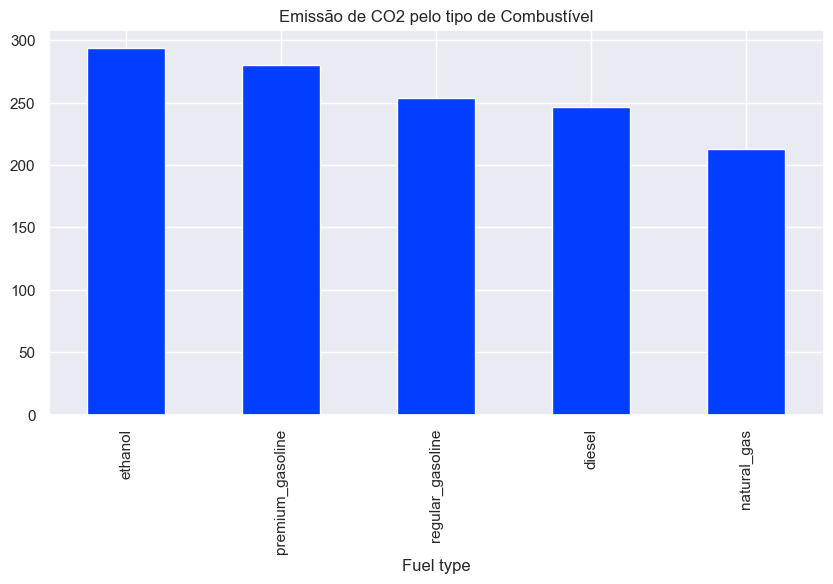

In [46]:
df.groupby(by='Fuel type')['CO2 emissions (g/km)'].mean().sort_values(ascending=False).plot(
    kind='bar', 
    title='Emissão de CO2 pelo tipo de Combustível', 
    figsize=(10,5))

##### Entendendo Mudança no Tipo de Combustível e na Emissão de CO2 no decorrer do anos

In [47]:
pd.crosstab(df['Model year'], df['Fuel type'], dropna=False).style.background_gradient(cmap='coolwarm')

Fuel type,diesel,ethanol,natural_gas,premium_gasoline,regular_gasoline
Model year,,,,,
2005,14,30,0,432,543
2006,12,23,0,389,544
2007,5,53,0,429,556
2008,5,48,0,480,546
2009,10,71,0,439,576
2010,14,71,0,408,537
2011,15,104,0,421,545
2012,16,104,0,432,539
2013,19,110,0,429,524


- Veja que o número de veículos com gasolina e ethanol diminuiu com o tempo, e o uso de veículos com diesel e gasolina premium aumentou.
- Dentro de cada um desses tipos de veículos com os tipos de combustível, a média de emissão foi diminuindo com o tempo?

In [48]:
pd.crosstab(
    df['Model year'], df['Fuel type'], values=df['CO2 emissions (g/km)'], aggfunc='mean', dropna=False
).style.background_gradient(cmap='coolwarm').format('{:.1f}')

Fuel type,diesel,ethanol,natural_gas,premium_gasoline,regular_gasoline
Model year,,,,,
2005,215.0,338.7,nan,299.6,292.4
2006,196.8,330.8,nan,297.1,291.1
2007,297.4,318.1,nan,296.9,287.4
2008,300.2,310.1,nan,297.2,281.6
2009,251.3,297.1,nan,301.7,274.8
2010,248.2,297.5,nan,298.5,260.6
2011,247.3,300.3,nan,286.2,261.2
2012,244.2,301.1,nan,280.6,255.6
2013,236.7,296.4,nan,270.2,245.7


Só tem um registro de gás natural, vamos exluir esse dado

In [49]:
df[df['Fuel type'] == 'natural_gas']

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),CO2 emissions (g/km),CO2 rating,Smog rating,gears
11925,2016,Chevrolet,Impala Dual Fuel,Mid-size,3.6,6,AS,natural_gas,15.2,9.5,12.7,213,6.0,NaN,6.0


In [50]:
df = df.drop(df[df['Fuel type'] == 'natural_gas'].index)

df[df['Fuel type'] == 'natural_gas']

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),CO2 emissions (g/km),CO2 rating,Smog rating,gears


##### Comparando Emissão de CO2 por Tipo de Transmissão

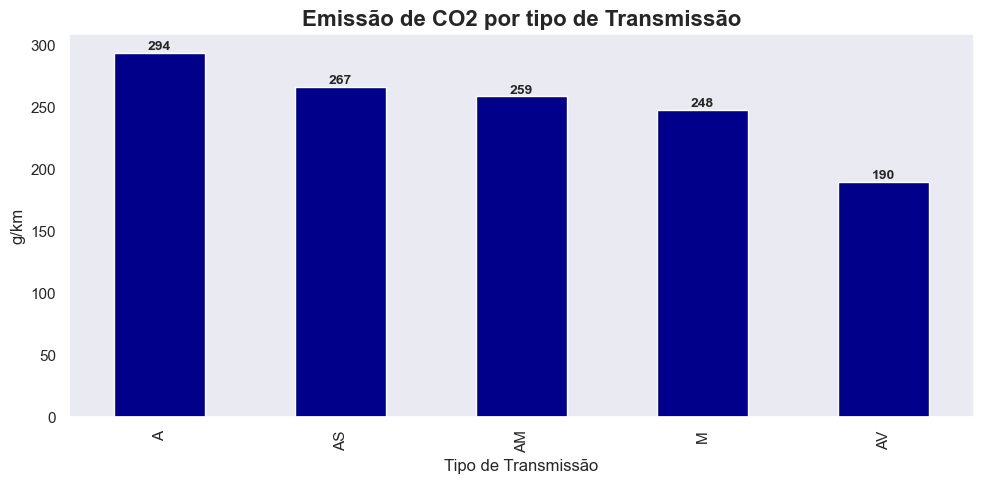

In [51]:
ax = df.groupby(by='Transmission')['CO2 emissions (g/km)'].mean().sort_values(ascending=False).plot(
    kind='bar', 
    title='Emissão de CO2 por quantidade de tipo de Transmissão', 
    figsize=(10,5),
    color='darkblue'
)

# Adicionando os valores em cima das barras
for p in ax.patches:
    valor = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # centraliza o texto na barra
        y=valor + 2,                      # posição acima da barra
        s=f'{valor:.0f}',                 # sem casas decimais
        ha='center', 
        fontsize=10, 
        weight='bold'
    )

# Melhorando layout
ax.set_ylabel('g/km')
ax.set_xlabel('Tipo de Transmissão')
ax.set_title('Emissão de CO2 por tipo de Transmissão', fontsize=16, weight='bold')
ax.grid(False)
plt.tight_layout()
plt.show()

##### Comparando Emissão de CO2 por Quantidade de Cilindros no Motor


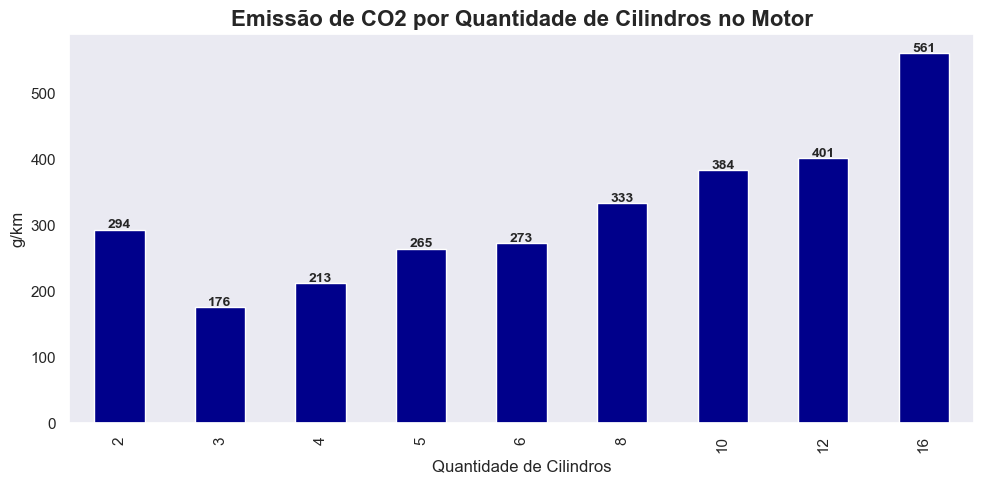

In [52]:
ax = df.groupby(by='Cylinders')['CO2 emissions (g/km)'].mean().plot(
    kind='bar', 
    title='Emissão de CO2 por quantidade de Cilindros no motor', 
    figsize=(10,5),
    color='darkblue'
)

# Adicionando os valores em cima das barras
for p in ax.patches:
    valor = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # centraliza o texto na barra
        y=valor + 2,                      # posição acima da barra
        s=f'{valor:.0f}',                 # sem casas decimais
        ha='center', 
        fontsize=10, 
        weight='bold'
    )

# Melhorando layout
ax.set_ylabel('g/km')
ax.set_xlabel('Quantidade de Cilindros')
ax.set_title('Emissão de CO2 por Quantidade de Cilindros no Motor', fontsize=16, weight='bold')
ax.grid(False)
plt.tight_layout()
plt.show()

##### Comparando Consumo Urbano e na Estrada

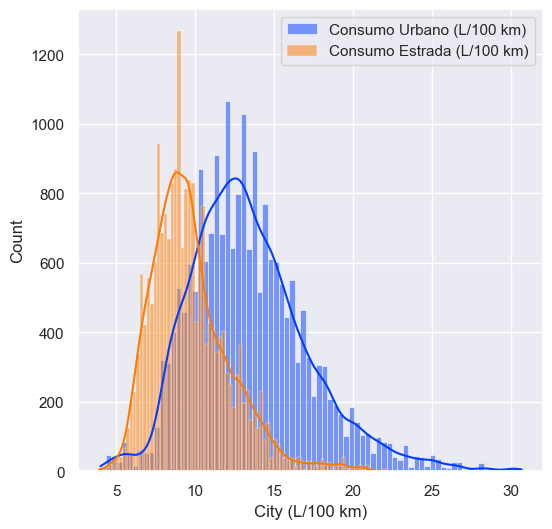

In [53]:
fig, ax = plt.subplots(figsize=(6,6))

sns.histplot(data=df, x='City (L/100 km)', ax=ax, kde=True, label='Consumo Urbano (L/100 km)')
sns.histplot(data=df, x='Highway (L/100 km)', ax=ax, kde=True, label='Consumo Estrada (L/100 km)')

plt.legend()
plt.show()

In [54]:
df.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'CO2 emissions (g/km)',
       'CO2 rating', 'Smog rating', 'gears'],
      dtype='object')

##### Analisando Variaçaõ da Emissão de CO2 pelo Tipo de Combustível

<Axes: xlabel='Combined (L/100 km)', ylabel='CO2 emissions (g/km)'>

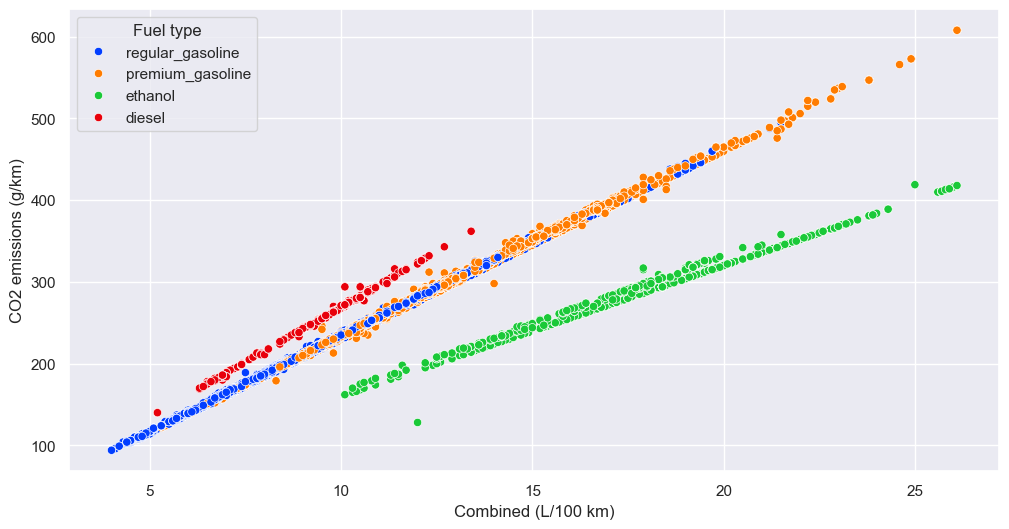

In [55]:
fig, ax = plt.subplots(figsize=(12,6))

sns.scatterplot(
    data=df,
    x='Combined (L/100 km)',
    y='CO2 emissions (g/km)',
    ax=ax,
    hue='Fuel type',
)

##### Simplificando os tipos de veículo para melhor análise

In [56]:
class_map = {
    "Two-seater": "car",
    "Minicompact": "car",
    "Subcompact": "car",
    "Compact": "car",
    "Mid-size": "car",
    "Full-size": "car",
    "Station wagon: Small": "station_wagon",
    "Station wagon: Mid-size": "station_wagon",
    "Pickup truck: Small": "pickup_truck",
    "Pickup truck: Standard": "pickup_truck",
    "Sport utility vehicle": "suv",
    "Sport utility vehicle: Small": "suv",
    "Sport utility vehicle: Standard": "suv",
    "Minivan": "van",
    "Van: Cargo": "van",
    "Van: Passenger": "van",
    "Special purpose vehicle": "special_purpose",
}

df["Vehicle_class_grouped"] = df["Vehicle class"].map(class_map)

df["Vehicle_class_grouped"].value_counts(dropna=False)

Vehicle_class_grouped
car                10719
suv                 5568
pickup_truck        2347
station_wagon       1025
van                  742
special_purpose      119
Name: count, dtype: int64

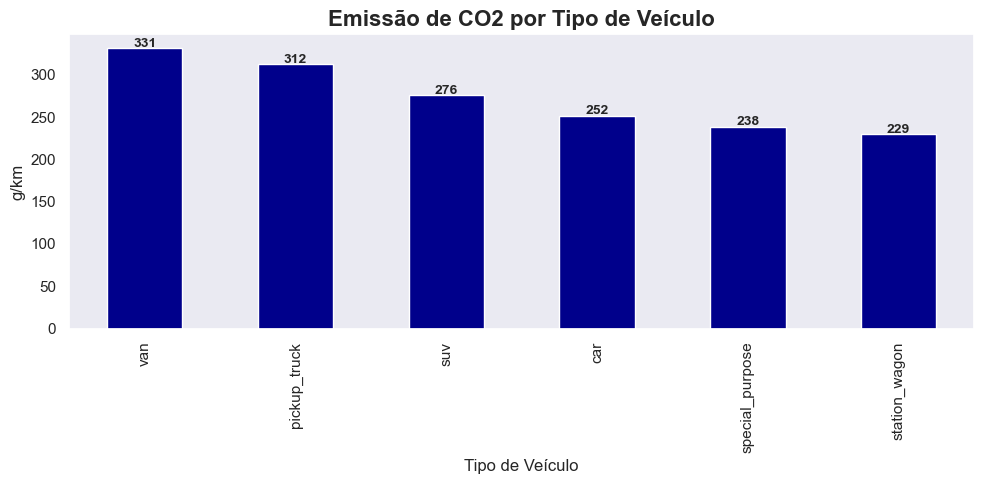

In [57]:
ax = df.groupby(by='Vehicle_class_grouped')['CO2 emissions (g/km)'].mean().sort_values(ascending=False).plot(
    kind='bar', 
    title='Emissão de CO2 por quantidade de tipo de Veículo', 
    figsize=(10,5),
    color='darkblue'
)

# Adicionando os valores em cima das barras
for p in ax.patches:
    valor = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # centraliza o texto na barra
        y=valor + 2,                      # posição acima da barra
        s=f'{valor:.0f}',                 # sem casas decimais
        ha='center', 
        fontsize=10, 
        weight='bold'
    )

# Melhorando layout
ax.set_ylabel('g/km')
ax.set_xlabel('Tipo de Veículo')
ax.set_title('Emissão de CO2 por Tipo de Veículo', fontsize=16, weight='bold')
ax.grid(False)
plt.tight_layout()
plt.show()

In [58]:
pd.crosstab(df['Fuel type'], df['Vehicle_class_grouped'], dropna=False)

Vehicle_class_grouped,car,pickup_truck,special_purpose,station_wagon,suv,van
Fuel type,,,,,,
diesel,104,102,0,28,135,0
ethanol,197,330,15,1,294,197
premium_gasoline,6669,117,21,446,1682,3
regular_gasoline,3749,1798,83,550,3457,542


In [59]:
pd.crosstab(
    df['Fuel type'], 
    df['Vehicle_class_grouped'], 
    values=df['CO2 emissions (g/km)'], 
    aggfunc='mean', 
    dropna=False
).style.background_gradient(cmap='coolwarm').format('{:.1f}')

Vehicle_class_grouped,car,pickup_truck,special_purpose,station_wagon,suv,van
Fuel type,,,,,,
diesel,199.0,272.7,nan,194.4,273.6,nan
ethanol,234.8,308.1,223.0,259.0,287.9,341.2
premium_gasoline,275.2,366.8,260.4,256.3,298.3,286.0
regular_gasoline,212.1,311.8,235.3,209.5,263.8,327.9


#### Simplificando nome das colunas

In [60]:
df.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'CO2 emissions (g/km)',
       'CO2 rating', 'Smog rating', 'gears', 'Vehicle_class_grouped'],
      dtype='object')

In [61]:
import re

def string_to_snake_case(string):
    """
    Converte uma string para snake_case.
    """
    string = re.sub("/", " ", string)                           # Substitui barras por espaços
    string = re.sub(" +", " ", string)                          # Remove multiplos espaços por unico espaço
    string = re.sub(" ", "_", string)                           # Substitui espaços por underscores
    string = re.sub("([a-z0-9])([A-Z])", r"\1_\2", string)      # Adiciona underscore entre letras minúsculas e maiúsculas
    string = re.sub("\(", "", string)                           # Remove parênteses
    string = re.sub("\)", "", string)                           # Remove parênteses
    #string = re.sub("-", "_", string)                          # Substitui hífens por underscores (não é o caso)

    return string.lower()                                       # retorna a string em minúsculas

In [62]:
[string_to_snake_case(coluna) for coluna in df.columns]

['model_year',
 'make',
 'model',
 'vehicle_class',
 'engine_size_l',
 'cylinders',
 'transmission',
 'fuel_type',
 'city_l_100_km',
 'highway_l_100_km',
 'combined_l_100_km',
 'co2_emissions_g_km',
 'co2_rating',
 'smog_rating',
 'gears',
 'vehicle_class_grouped']

In [63]:
df.columns = [string_to_snake_case(coluna) for coluna in df.columns]
df.head()

,model_year,make,model,vehicle_class,engine_size_l,cylinders,transmission,fuel_type,city_l_100_km,highway_l_100_km,combined_l_100_km,co2_emissions_g_km,co2_rating,smog_rating,gears,vehicle_class_grouped
0,2005,Acura,1.7EL,Compact,1.7,4,A,regular_gasoline,9.2,7.2,8.3,191,NaN,NaN,4.0,car
1,2005,Acura,1.7EL,Compact,1.7,4,M,regular_gasoline,9.1,7.3,8.3,191,NaN,NaN,5.0,car
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A,premium_gasoline,15.9,11.1,13.7,315,NaN,NaN,5.0,suv
3,2005,Acura,NSX,Two-seater,3.0,6,AS,premium_gasoline,15.1,10.5,13.0,299,NaN,NaN,4.0,car
4,2005,Acura,NSX,Two-seater,3.2,6,M,premium_gasoline,15.1,10.5,13.0,299,NaN,NaN,6.0,car


#### Exportando dataframe consolidado antes do tratamento dos dados

In [ ]:
df.drop(columns='vehicle_class_grouped').to_parquet('../dados/canada_consolidado.parquet', index=False)

# OBS: Foi eliminado a coluna "vehicle_class_grouped" pois ela não veio da base de dados original, foi criada nessa análise exploratória.

#### Eliminando e Tratando Colunas antes de exportar a base tratada

#### Eliminar colunas?
-  **'Model':** temos 3522 valores unicos, são muitos dados variados, não vale a pena manter na base que será exportada --> *Já eliminado anteriormente*
- **'Make'**: temos 48 valores unicos, são muitos dados variados, foi mantido na análise exploratória mas vamos eliminar agora.
- **'CO2 rating'** e **'Smog rating'**: são informações que tem alta correlação com o CO2 emissions, que será nossa variável alvo do modelo, ou seja, manter essa coluna representa um 'vazamento de informações' pro modelo de machine learning
- **'Combined (mpg)'**: já temos essa informação através da coluna "Combined (L/100 km)" --> *Já eliminado anteriormente*
- **'Vehicle Class**: foi criado a coluna 'vehicle_class_grouped' que já tem os dados mais simplificados.
- **'Gears'**: vimos que não faz tanta diferença no resultado da emissão de CO2, não vale a pena manter na base exportada

In [ ]:
df = df.drop(
    columns=[
        'make',
        'model'
        'co2_rating',
        'smog_rating',
        'vehicle_class',
        'gears',
    ]
)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20520 entries, 0 to 20520
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   model_year             20520 non-null  int64  
 1   engine_size_l          20520 non-null  float64
 2   cylinders              20520 non-null  int64  
 3   transmission           20520 non-null  object 
 4   fuel_type              20520 non-null  object 
 5   city_l_100_km          20520 non-null  float64
 6   highway_l_100_km       20520 non-null  float64
 7   combined_l_100_km      20520 non-null  float64
 8   co2_emissions_g_km     20520 non-null  int64  
 9   vehicle_class_grouped  20520 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 1.7+ MB


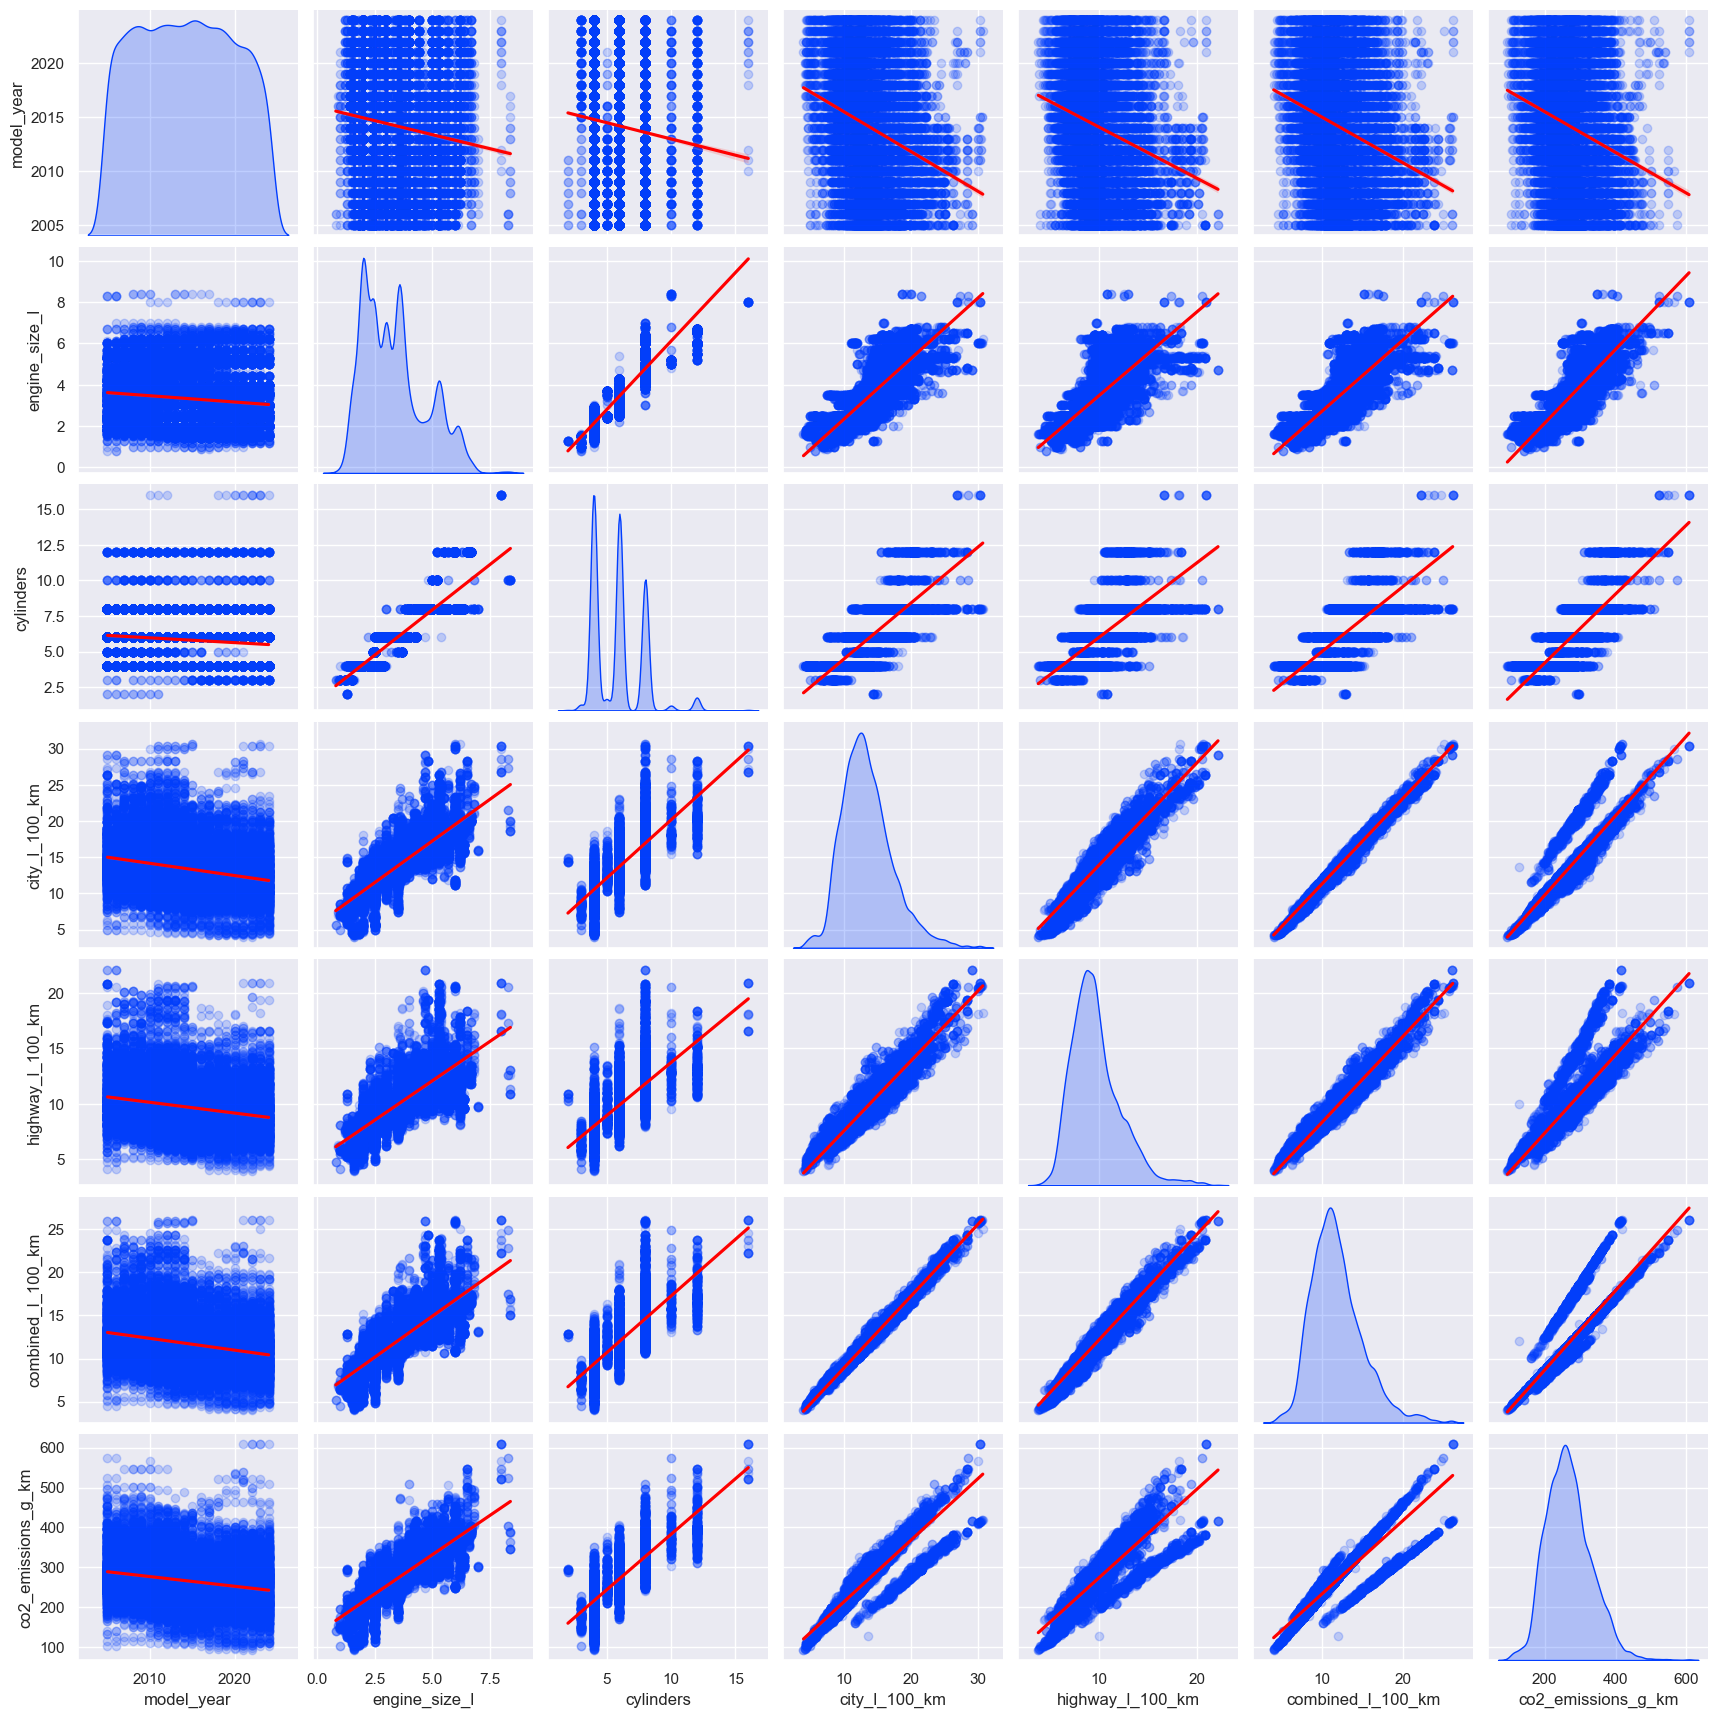

In [239]:
sns.pairplot(
    df, 
    diag_kind='kde',
    kind='reg',
    plot_kws={'scatter_kws': {'alpha': 0.2}, 'line_kws': {'color': 'red'}}
)

In [240]:
df.nunique()

model_year                20
engine_size_l             61
cylinders                  9
transmission               5
fuel_type                  4
city_l_100_km            237
highway_l_100_km         168
combined_l_100_km        207
co2_emissions_g_km       374
vehicle_class_grouped      6
dtype: int64

In [241]:
df['engine_size_l'].value_counts()

engine_size_l
2.0    3142
3.0    2062
3.5    1420
2.5    1407
3.6    1194
       ... 
2.1       5
2.6       4
0.8       3
0.9       3
5.8       2
Name: count, Length: 61, dtype: int64

Será que não temos que dividir os tamanhos de motores em grupos?

In [242]:
df['engine_size_l'].value_counts(bins=5).sort_index()

(0.791, 2.32]    5497
(2.32, 3.84]     9215
(3.84, 5.36]     3911
(5.36, 6.88]     1853
(6.88, 8.4]        44
Name: count, dtype: int64

In [243]:
df['engine_size_l_class'] = pd.cut(
    df['engine_size_l'],
    bins=[-np.inf, 2.0, 4.0, 6.0, np.inf],
    labels=['up_to_2L', 'up_to_4L', 'up_to_6L', 'more_than_6L']
)

df['engine_size_l'].value_counts().sort_index()

engine_size_l
0.8     3
0.9     3
1.0    33
1.2    43
1.3    68
       ..
6.8    21
7.0     8
8.0    16
8.3     7
8.4    13
Name: count, Length: 61, dtype: int64

Será que não devo fazer o mesmo para a quantidade de cilindros?

In [244]:
df['cylinders_class'] = pd.cut(
    df['cylinders'],
    bins=[-np.inf, 4, 6, 8, np.inf],
    labels=['up_to_4', 'up_to_6', 'up_to_8', 'more_than_8']
)

df['cylinders_class'].value_counts().sort_index()

cylinders_class
up_to_4        7890
up_to_6        7346
up_to_8        4645
more_than_8     639
Name: count, dtype: int64

In [ ]:
df = df.drop(columns=['engine_size_l','cylinders'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20520 entries, 0 to 20520
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   model_year             20520 non-null  int64   
 1   transmission           20520 non-null  object  
 2   fuel_type              20520 non-null  object  
 3   city_l_100_km          20520 non-null  float64 
 4   highway_l_100_km       20520 non-null  float64 
 5   combined_l_100_km      20520 non-null  float64 
 6   co2_emissions_g_km     20520 non-null  int64   
 7   vehicle_class_grouped  20520 non-null  object  
 8   engine_size_l_class    20520 non-null  category
 9   cylinders_class        20520 non-null  category
dtypes: category(2), float64(3), int64(2), object(3)
memory usage: 1.4+ MB


#### Exportando a base consolidada

In [246]:
df.to_parquet('../dados/canada_tratados.parquet', index=False)